In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
t = np.linspace(20,35,100)
t = t + np.random.normal(0.0, 0.1, 100)

def periodic_function(a, interval, dist, t):
    return (a[0] + a[1]*t + a[2]*np.sin(a[4]*t) + a[3]*np.cos(a[4]*t) + np.random.normal(0.0, dist, interval[2]))

In [15]:
data = periodic_function([0,1,1,1,0], [20,35,100], 0.5, t)

Text(0, 0.5, 'Data')

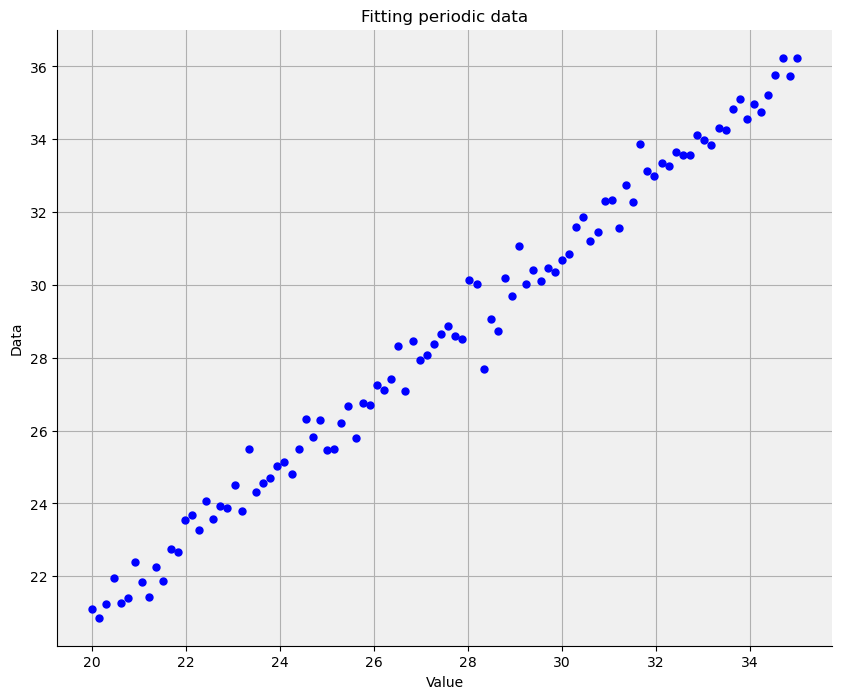

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

plt.plot(np.linspace(20,35,100), data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)


plt.title("Fitting periodic data")
plt.xlabel("Value")
plt.ylabel("Data")

In [17]:
def fitfunction(x, a, b, c, d, e):
    return a + b*x + c*np.sin(e*x) + d*np.cos(e*x) 

In [18]:
from scipy.optimize import curve_fit

init_vals = [1,1,1,1,1]

popt, pcov = curve_fit(fitfunction, t, data, p0=init_vals)

print (popt)
print (pcov)

for i in range(len(popt)):
    print(f"{popt[i]} +/- {np.sqrt(pcov[i][i])}")

[ 1.17515486  0.99376043 -0.00882611 -0.08154053  0.67000261]
[[ 1.01841484e-01 -3.58236547e-03 -4.79430526e-02  3.10435822e-03
   1.91790217e-02]
 [-3.58236547e-03  1.29018629e-04  1.57590623e-03 -6.79061248e-05
  -6.29089022e-04]
 [-4.79430526e-02  1.57590623e-03  1.76217595e-01 -1.80037013e-02
  -7.66667819e-02]
 [ 3.10435822e-03 -6.79061248e-05 -1.80037013e-02  6.53787521e-03
   7.92507965e-03]
 [ 1.91790217e-02 -6.29089022e-04 -7.66667819e-02  7.92507965e-03
   3.42132544e-02]]
1.1751548600068813 +/- 0.3191261251255797
0.9937604340991587 +/- 0.011358636768612066
-0.008826113315484925 +/- 0.4197827950086355
-0.08154053020151712 +/- 0.0808571283521803
0.6700026088492004 +/- 0.18496825253633425


These values do not agree, within error, with the expected value

In [19]:
yfit = []
chi2=0
for i in range (0,100):
    yfit.append(fitfunction(t[i],*popt))
    chi2 += (data[i]-yfit[i])*(data[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,100-len(init_vals)))

Chi^2 / dof = 2.008E+01 / 95


Text(0, 0.5, 'Data')

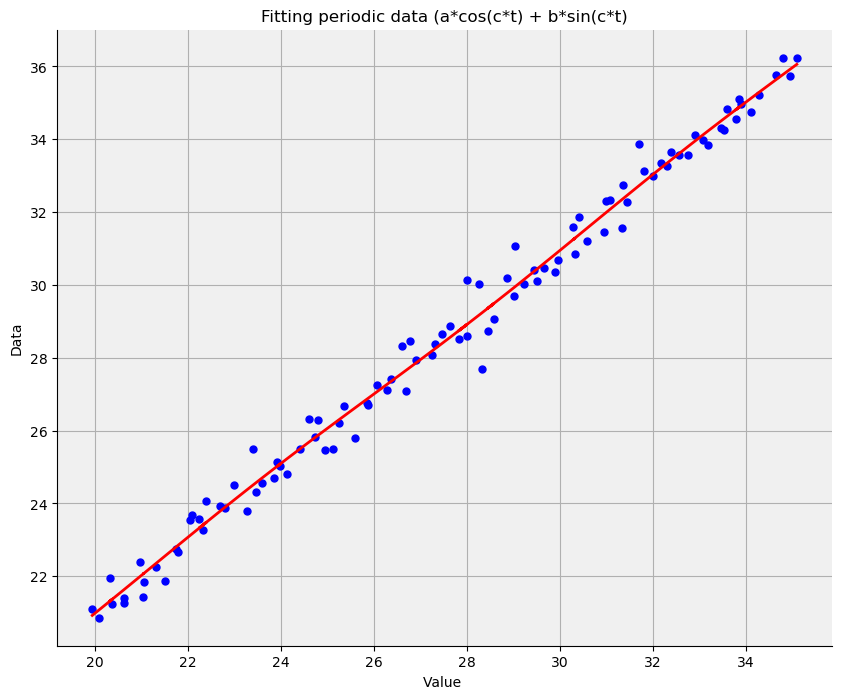

In [20]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(t,yfit,color='r', linewidth=2)#, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Fitting periodic data (a*cos(c*t) + b*sin(c*t)")
plt.xlabel("Value ")
plt.ylabel("Data")


In [21]:
def fitfunction2(t, a, b, c, d, e):
    return a + b*t + c*np.sin(e*t + d)

In [22]:
from scipy.optimize import curve_fit

init_vals = [1,1,1,1,1]

popt2, pcov2 = curve_fit(fitfunction2, t, data, p0=init_vals)

print (popt2)
print (pcov2)

for i in range(len(popt2)):
    print(f"{popt2[i]} +/- {np.sqrt(pcov2[i][i])}")

[ 1.17510854  0.99376195 -0.0820154   7.74844215  0.66991938]
[[ 1.01866007e-01 -3.58322145e-03 -2.15783242e-03 -5.85968672e-01
   1.92089676e-02]
 [-3.58322145e-03  1.29048402e-04  1.04860833e-04  1.92181506e-02
  -6.30181697e-04]
 [-2.15783242e-03  1.04860833e-04  4.65254212e-03  1.05255529e-02
  -5.03001185e-04]
 [-5.85968672e-01  1.92181506e-02  1.05255529e-02  2.64908382e+01
  -9.40266256e-01]
 [ 1.92089676e-02 -6.30181697e-04 -5.03001185e-04 -9.40266256e-01
   3.42337074e-02]]
1.1751085436015476 +/- 0.3191645446263591
0.9937619536927411 +/- 0.011359947281202175
-0.08201540338479639 +/- 0.06820954566610742
7.7484421494136475 +/- 5.146925124709066
0.6699193835474223 +/- 0.18502353208310476


In [23]:
yfit2 = []
chi22=0
for i in range (0,100):
    yfit2.append(fitfunction2(t[i],*popt2))
    chi22 += (data[i]-yfit2[i])*(data[i]-yfit2[i])

print ("Chi^2 / dof = %.3E / %d" % (chi22,100-len(init_vals)))

Chi^2 / dof = 2.008E+01 / 95


Text(0, 0.5, 'Data')

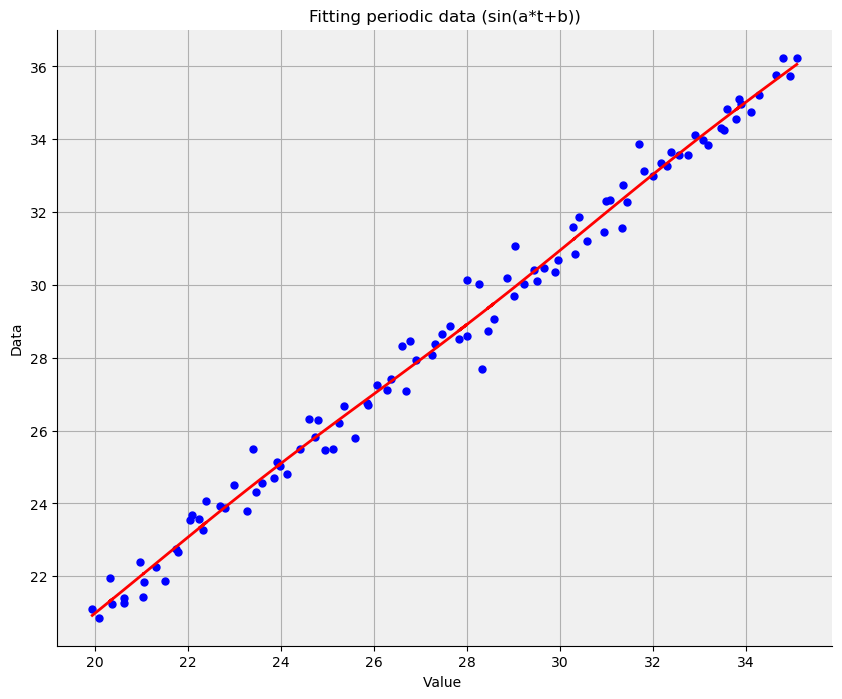

In [24]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(t,yfit2,color='r', linewidth=2)#, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Fitting periodic data (sin(a*t+b))")
plt.xlabel("Value ")
plt.ylabel("Data")


The two fitting methods give identical chi^2 values, so they fit equally well.